# Simple Pytorch Tutorial

In [1]:
# !pip install torch torchvision

In [2]:
import torch
# 创建一个一维 Tensor
tensor_1d = torch.tensor([1, 2, 3, 4, 5])
print("1D Tensor:", tensor_1d)
# 创建一个二维 Tensor
tensor_2d = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("2D Tensor:\n", tensor_2d)
# 创建一个 3x3 随机 Tensor
random_tensor = torch.rand(3, 3)
print("Random Tensor:\n", random_tensor)


1D Tensor: tensor([1, 2, 3, 4, 5])
2D Tensor:
 tensor([[1, 2, 3],
        [4, 5, 6]])
Random Tensor:
 tensor([[0.7321, 0.6239, 0.2407],
        [0.8121, 0.4824, 0.6817],
        [0.8469, 0.4116, 0.3711]])


In [3]:
# 访问元素
element = tensor_2d[1, 2]  # 访问第二行第三列的元素
print("Element at (1, 2):", element)

# 切片
slice_tensor = tensor_2d[:, 1]  # 访问所有行的第二列
print("Slice (all rows, 1st column):", slice_tensor)

# Tensor 加法
tensor_a = torch.tensor([1, 2, 3])
tensor_b = torch.tensor([4, 5, 6])
tensor_sum = tensor_a + tensor_b
print("Sum:", tensor_sum)

# Tensor 乘法
tensor_product = tensor_a * tensor_b
print("Product:", tensor_product)

# 矩阵乘法
matrix_a = torch.tensor([[1, 2], [3, 4]])
matrix_b = torch.tensor([[5, 6], [7, 8]])
matrix_product = torch.matmul(matrix_a, matrix_b)
print("Matrix Product:\n", matrix_product)


Element at (1, 2): tensor(6)
Slice (all rows, 1st column): tensor([2, 5])
Sum: tensor([5, 7, 9])
Product: tensor([ 4, 10, 18])
Matrix Product:
 tensor([[19, 22],
        [43, 50]])


In [4]:
# 改变形状
reshaped_tensor = tensor_2d.view(3, 2)
print("tensor.shape:", tensor_2d, "Reshaped Tensor:\n", reshaped_tensor)
# 连接 Tensors
tensor_c = torch.tensor([[7, 8, 9]])
concatenated_tensor = torch.cat((tensor_2d, tensor_c), dim=0)
print("Concatenated Tensor:\n", concatenated_tensor)


tensor.shape: tensor([[1, 2, 3],
        [4, 5, 6]]) Reshaped Tensor:
 tensor([[1, 2],
        [3, 4],
        [5, 6]])
Concatenated Tensor:
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [5]:
# 检查是否可以使用 GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU")
else:
    device = torch.device("cpu")
    print("Using CPU")

# 创建一个 Tensor 并移动到 GPU
tensor_on_gpu = tensor_1d.to(device)
print("Tensor on GPU:", tensor_on_gpu)


Using GPU
Tensor on GPU: tensor([1, 2, 3, 4, 5], device='cuda:0')


# Simple Steps to Train Your Neural Network

- Step 1: Problem Definition
    - Input $x$
    - Output $y$
- Step 2: Data Preparation
    - Download and Formatting Data: torch.utils.data.Dataset, torch.utils.data.DataLoader
    - Data Preprocessing: torchvision.transforms
- Step 3: Model Architecture Design $f$
    - torch.nn (Example: 2-Layer Neural Network)
- Step 4: Loss Function Design $l(f(x), y)$
    - torch.nn.functional (Example: CrossEntropyLoss)
- Step 5: Optimizer Selection $\min l(f(x), y)$
    - torch.optim (Example: mini-batch SGD)
- Iteration:
    - Step 7: Train the Neural Network
        - Convergence, Loss curve  
    - Step 8: Validate the Model
        - Train / Validation / Test
    - Step 9: Evaluate the Model
        - Accuracy
    - Step 10: Model Tuning, Break if Got an Ideal Model
        - Tuning hyperparameters

## Step 1: Problem Definition

Image Classification:

Input: 
- modality: image
- datatype: uint8
- shape:(224, 224, 3)
- ranging: [0, 255]

Output: 
- label: car, frog, ..., N classes
- datatype: long
- shape: (1,)
- ranging: [0, N-1]

## Step 2: Prepare the Data

recall that you have already used the `trainset` and `testset` in your assignment1:

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 设置 matplotlib 显示格式
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # 设置默认图像大小
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# CIFAR-10 数据集的下载和加载
transform = transforms.Compose(
    [transforms.ToTensor(),  # 转换为 Tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]  # 归一化
)

# 从零开始下载数据集
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


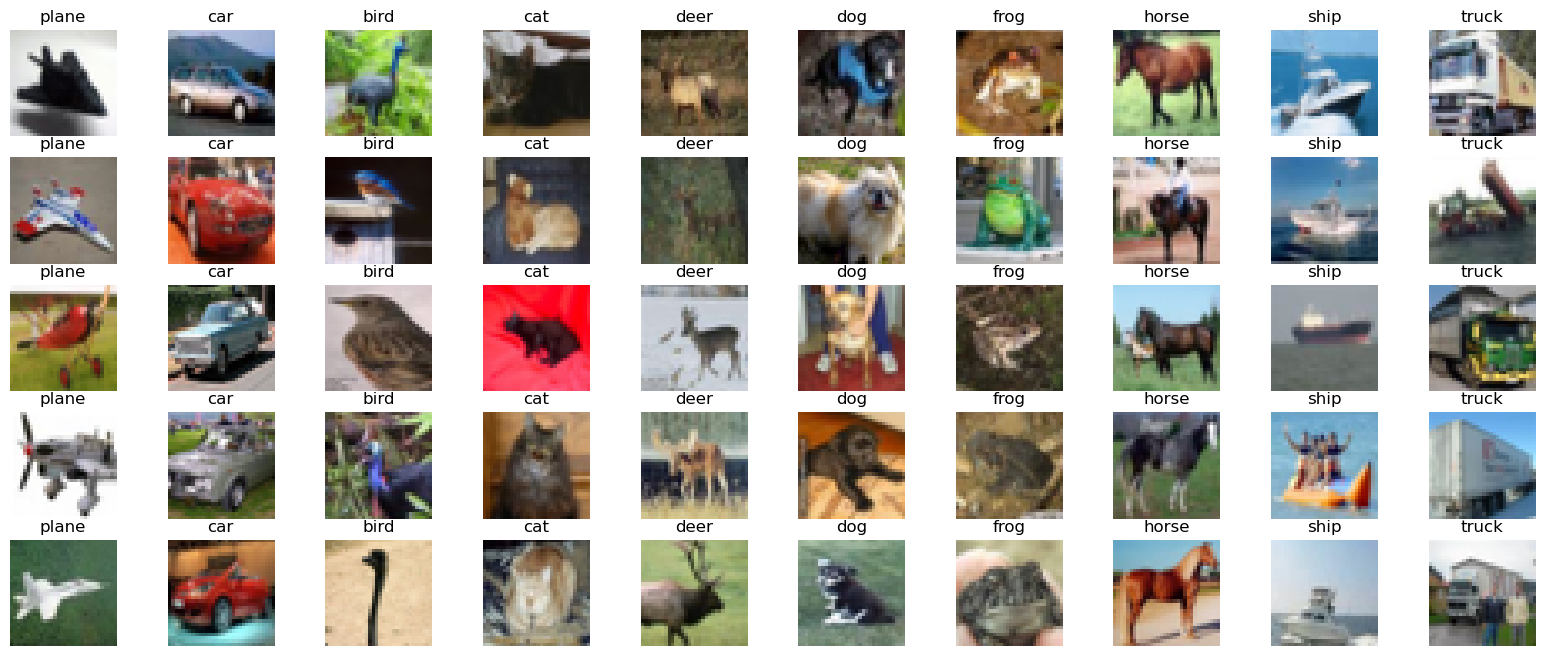

Training data shape: 50000
Test data shape: 10000


In [7]:
# CIFAR-10的分类标签
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_samples = 5

# 为每个类别获取10个样本
def get_samples_per_class(data, num_samples=10):
    samples = {cls: [] for cls in range(len(classes))}
    
    for img, label in zip(data.data, data.targets):
        if len(samples[label]) < num_samples:
            samples[label].append(img)
        # 当所有类都满足数量要求时，结束
        if all(len(samples[cls]) == num_samples for cls in samples):
            break
    
    return samples
    
# 获取每个类10个样本
samples = get_samples_per_class(trainset, num_samples)

# 绘制N(类别数) x 10 的figure，标注label
def plot_samples(samples, num_classes=len(classes), samples_per_class=10):
    fig, axes = plt.subplots(samples_per_class, num_classes, figsize=(num_classes+10, samples_per_class+3))
    for i, (cls, imgs) in enumerate(samples.items()):
        for j, img in enumerate(imgs):
            ax = axes[j, i]
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(classes[cls])
    plt.show()
# 显示样本图像
plot_samples(samples, samples_per_class=num_samples)
# imshow(torchvision.utils.make_grid(images))
# # 打印标签
# print(' '.join(f'{classes[labels[j]]}' for j in range(4)))

# 打印训练集和测试集的大小
print(f'Training data shape: {len(trainset)}')
print(f'Test data shape: {len(testset)}')

we did not use it in assignment1. lets figure out how to use the `trainset` and `testset`

## 1.1 torch.utils.data.Dataset

In [8]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

# 自定义数据集类
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        """
        初始化数据集
        data: 输入数据，例如一个 NumPy 数组或 PyTorch 张量
        labels: 对应的标签
        """
        self.data = data
        self.labels = labels

    def __len__(self):
        # 每个Dataset都必须写，返回数据集的大小
        return len(self.data)

    def __getitem__(self, idx):
        # 每个Dataset都必须写，获取指定索引idx的数据和标签
        sample = self.data[idx]
        label = self.labels[idx]
        return torch.tensor(sample, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

# 创建一些示例数据
data = np.random.rand(100, 3)  # 100个样本，每个样本有3个特征
labels = np.random.randint(0, 2, size=(100,))  # 100个样本的标签（0或1）

# 初始化自定义数据集
dataset = CustomDataset(data, labels)

# 迭代加载的数据
for idx, data in enumerate(dataset):
    print(f"idx: {idx}, Data: {data[0]}, Labels: {data[1]}")
    if idx == 2:
        break


idx: 0, Data: tensor([0.7510, 0.2417, 0.4252]), Labels: 0
idx: 1, Data: tensor([0.0713, 0.7384, 0.9407]), Labels: 1
idx: 2, Data: tensor([0.8793, 0.2146, 0.7023]), Labels: 1


In [9]:
class OursDataset(Dataset):
    def __init__(self, data, labels):
        """
        初始化数据集
        data: 输入数据，例如一个 NumPy 数组或 PyTorch 张量
        labels: 对应的标签
        """
        self.data = data
        self.labels = labels

    def __len__(self):
        # 每个Dataset都必须写，返回数据集的大小
        return len(self.data)

    def __getitem__(self, idx):
        # 每个Dataset都必须写，获取指定索引idx的数据和标签
        sample = self.data[idx]
        label = self.labels[idx]
        return torch.tensor(sample, dtype=torch.uint8), torch.tensor(label, dtype=torch.long)

data = trainset.data
labels = trainset.targets

# 初始化自定义数据集
dataset = OursDataset(data, labels)

# 迭代加载的数据
for idx, data in enumerate(dataset):
    print(f"idx: {idx}, Data: {data[0].shape}, Labels: {data[1]}")
    if idx == 2:
        break
print(f"Ours datashape: {dataset[0][0].shape}, Trainset datashape: {trainset[0][0].shape}")
print(f"Ours data: {dataset[0][0][0, 0, :]}, Trainset Data: {trainset[0][0][:, 0, 0]}")
print(f"Ours Label: {dataset[0][1]}, Trainset Data: {trainset[0][1]}")

idx: 0, Data: torch.Size([32, 32, 3]), Labels: 6
idx: 1, Data: torch.Size([32, 32, 3]), Labels: 9
idx: 2, Data: torch.Size([32, 32, 3]), Labels: 9
Ours datashape: torch.Size([32, 32, 3]), Trainset datashape: torch.Size([3, 32, 32])
Ours data: tensor([59, 62, 63], dtype=torch.uint8), Trainset Data: tensor([-0.5373, -0.5137, -0.5059])
Ours Label: 6, Trainset Data: 6


Define `transform` in `__init__`, wait, what is `transform`?

### 1.2 torchvision.transforms import v2

image transformations: find more in https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html

torch.Size([3, 16, 16])


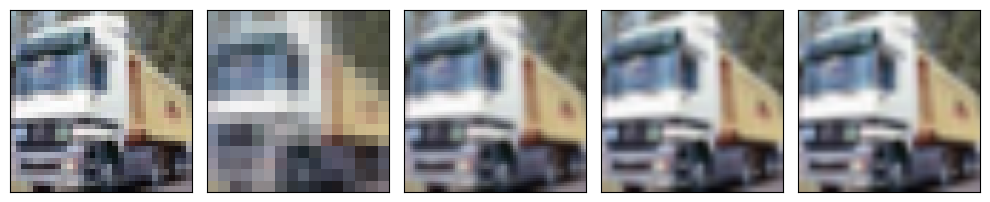

In [10]:
import matplotlib.pyplot as plt
from torchvision.transforms import v2
from helpers import plot

orig_img = dataset[1][0].permute(2, 0, 1)
resized_imgs = [v2.Resize(size=size)(orig_img) for size in (16, 64, 256, 1024)]
print(resized_imgs[0].shape)
plot([orig_img] + resized_imgs)

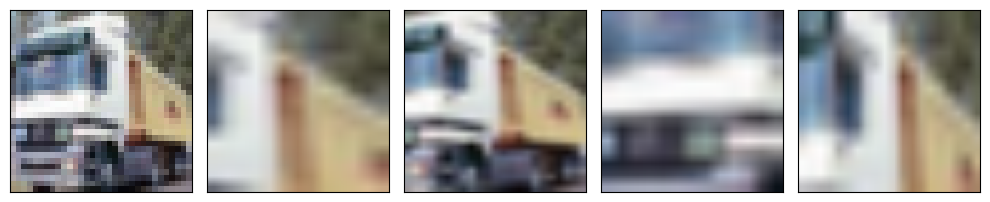

In [11]:
# Crop a random portion of image and resize it to a given size.
resize_cropper = v2.RandomResizedCrop(size=(256, 256))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot([orig_img] + resized_crops)

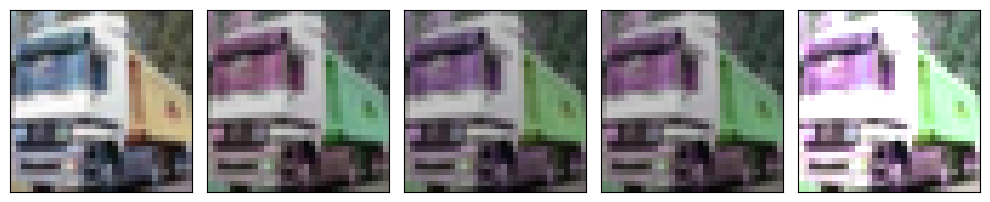

In [12]:
# randomly changes the brightness, contrast, saturation, hue, and other properties of an image.
jitter = v2.ColorJitter(brightness=.5, hue=.3)
jittered_imgs = [jitter(orig_img) for _ in range(4)]
plot([orig_img] + jittered_imgs)

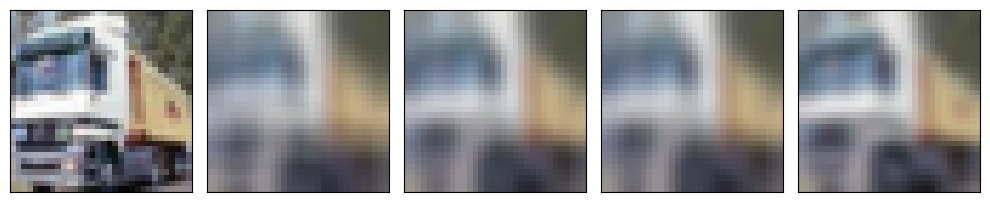

In [13]:
# performs gaussian blur transform on an image.
blurrer = v2.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot([orig_img] + blurred_imgs)

In [14]:
class OursDatasetwithTransforms(Dataset):
    def __init__(self, data, labels, transforms):
        """
        初始化数据集
        data: 输入数据，例如一个 NumPy 数组或 PyTorch 张量
        labels: 对应的标签
        """
        self.data = data
        self.labels = labels
        self.transforms = transforms

    def __len__(self):
        # 每个Dataset都必须写，返回数据集的大小
        return len(self.data)

    def __getitem__(self, idx):
        # 每个Dataset都必须写，获取指定索引idx的数据和标签
        sample = self.data[idx]
        label = self.labels[idx]
        sample = self.transforms(sample)
        return torch.tensor(sample, dtype=torch.float32), torch.tensor(label, dtype=torch.long)
        
transform = transforms.Compose(
    [transforms.ToTensor(),  # [0, 255], PIL Image / ndarray --> [0, 1], torch.tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]  # 归一化, (input[channel] - mean[channel]) / std[channel]
)
data = trainset.data
labels = trainset.targets

# 初始化自定义数据集
dataset_with_transform = OursDatasetwithTransforms(data, labels, transform)

# 迭代加载的数据
for idx, data in enumerate(dataset_with_transform):
    print(f"idx: {idx}, Data: {data[0].shape}, Labels: {data[1]}")
    if idx == 2:
        break
print(f"Ours datashape: {dataset_with_transform[0][0].shape}, Trainset datashape: {trainset[0][0].shape}")
print(f"Ours data: {dataset_with_transform[0][0][:, 0, 0]}, Trainset Data: {trainset[0][0][:, 0, 0]}")
print(f"Ours Label: {dataset_with_transform[0][1]}, Trainset Data: {trainset[0][1]}")

idx: 0, Data: torch.Size([3, 32, 32]), Labels: 6
idx: 1, Data: torch.Size([3, 32, 32]), Labels: 9
idx: 2, Data: torch.Size([3, 32, 32]), Labels: 9
Ours datashape: torch.Size([3, 32, 32]), Trainset datashape: torch.Size([3, 32, 32])
Ours data: tensor([-0.5373, -0.5137, -0.5059]), Trainset Data: tensor([-0.5373, -0.5137, -0.5059])
Ours Label: 6, Trainset Data: 6


C:\Users\charles0618\AppData\Local\Temp\ipykernel_33944\127247838.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(sample, dtype=torch.float32), torch.tensor(label, dtype=torch.long)


## 1.3 torch.utils.data.DataLoader

It represents a Python iterable over a dataset

In [15]:
from torch.utils.data import DataLoader
trainloader = DataLoader(trainset, batch_size=10, shuffle=False, drop_last=False)
for i, data in enumerate(trainloader):  # TODO should be trainloader rather than dataloader here.
    print(len(data), data[0].shape, data[1].shape)
    print(data[1]) # labels
    break
testloader = DataLoader(testset, batch_size=10, shuffle=False, drop_last=False)


2 torch.Size([10, 3, 32, 32]) torch.Size([10])
tensor([6, 9, 9, 4, 1, 1, 2, 7, 8, 3])


# Step 3: Model Architecture Design

## An example to understand the concept of `model`, `training`, `loss`


suppose we have 50 `data` with 1 dimention, we want to design a function $f$ (we will call it a `model` in the next few months), such that the curve of function `fits` the data

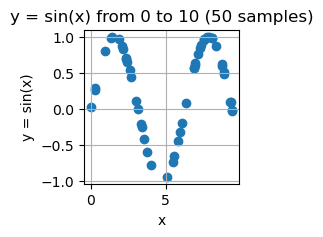

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Sample 500 points between 0 and 10
x = np.random.uniform(0, 10, 50)
y = np.sin(x)

plt.figure(figsize=(2,2))

# Plot the sampled points
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y = sin(x)")
plt.title("y = sin(x) from 0 to 10 (50 samples)")
plt.grid(True)
plt.show()


observing the data curve, we easily identify that it could be perfect if the function is a `sin/cos(x)`. Therefore we define the function as:

$$f(x) = a\sin(bx+c) + d$$

and simply define a L2 penalty, when the function does not predict well (we will call it `loss`):

$$\min_{a,b,c,d}J(a,b,c,d)={(f(x) - y)^{2}}$$

here, a,b,c,d are `parameters`

How to `optimize` the `parameters` in order to minimize the loss?

Understanding Gradient descent via an Example:

at first, a,b,c,d are randomly initialized, therefore the loss is large, suppose the parameter-loss curve be like (not the real curve of our loss): 
<img src="./GD.png">

after optimizing the parameters through gradient descent, the function `diverges` in `local minima`

Specifically, the gradient is the derivative of the function, i.e., $\frac{\delta f}{\delta a}$.

Going along the direction of derivatives step by step, the gradient descent is formulated as:

$$ w_i = w_i - \alpha\cdot \frac{\delta J(w)}{\delta w}, w=[a,b,c,d]$$

the $\alpha$ is `learning rate`, determining the length that you update the parameters.

Here we have N samples, therefore the formula is actually calculated as:

$$ w_i = w_i - \alpha\cdot \frac{1}{N} \Sigma_{j=0}^{N} \frac{\delta J_j(w)}{\delta w}, w=[a,b,c,d]$$


variants of gradient descent:

we call the number of sample used in one update as `batch_size`

- Batch GD: update parameter using the whole training data
$$ w_i = w_i - \alpha\cdot \frac{1}{N} \Sigma_{j=0}^{N} \frac{\delta J_j(w)}{\delta w}, w=[a,b,c,d]$$
- Stochastic GD: update parameter using only one sample
$$ w_i = w_i - \alpha\cdot \frac{\delta J_j(w)}{\delta w}, w=[a,b,c,d]$$
- Mini-Batch GD: update parameter using a mini batch of sample
$$ w_i = w_i - \alpha\cdot \frac{1}{m} \Sigma_{j=0}^{m} \frac{\delta J_j(w)}{\delta w}, w=[a,b,c,d], m<N$$



Epoch [500/5000], Loss: 0.3574
Epoch [1000/5000], Loss: 0.3267
Epoch [1500/5000], Loss: 0.3176
Epoch [2000/5000], Loss: 0.3036
Epoch [2500/5000], Loss: 0.2399
Epoch [3000/5000], Loss: 0.1250
Epoch [3500/5000], Loss: 0.0318
Epoch [4000/5000], Loss: 0.0034
Epoch [4500/5000], Loss: 0.0003
Epoch [5000/5000], Loss: 0.0000


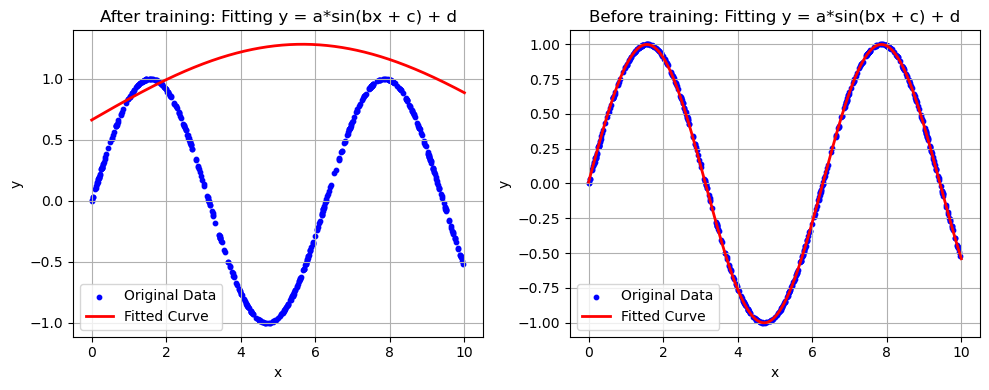

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
torch.manual_seed(1)
# Generate the random dataset (as previously discussed)
x_np = np.random.uniform(0, 10, 500)
y_np = np.sin(x_np)

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_np, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(y_np, dtype=torch.float32).view(-1, 1)

# Define the model: y = a * sin(bx + c) + d
class SinModel(nn.Module):
    def __init__(self):
        super(SinModel, self).__init__()
        # Initialize parameters a, b, c, d
        self.a = nn.Parameter(torch.randn(1))  # Learnable parameter a
        self.b = nn.Parameter(torch.randn(1))  # Learnable parameter b
        self.c = nn.Parameter(torch.randn(1))  # Learnable parameter c
        self.d = nn.Parameter(torch.randn(1))  # Learnable parameter d
    
    def forward(self, x):
        # Implement the function y = a * sin(bx + c) + d
        return self.a * torch.sin(self.b * x + self.c) + self.d

# Instantiate the model
model = SinModel()
x_fit = np.linspace(0, 10, 500)  # TODO new line here, to define x_fit
y_fit_before = model(torch.tensor(x_fit, dtype=torch.float32).view(-1, 1)).detach().numpy()


# Define the loss function (L2 loss) and the optimizer (Gradient Descent)
criterion = nn.MSELoss()  # L2 loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 5000
for epoch in range(num_epochs):
    # Forward pass: compute the model output
    y_pred = model(x_train)
    
    # Compute the loss
    loss = criterion(y_pred, y_train)
    
    # Backward pass: compute the gradients
    optimizer.zero_grad()  # Zero the gradient buffers
    loss.backward()  # Compute gradients
    
    # Update the model parameters using gradient descent
    optimizer.step()
    
    # Print the loss every 100 epochs
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the original data and the fitted curve
x_fit = np.linspace(0, 10, 500)
y_fit_after = model(torch.tensor(x_fit, dtype=torch.float32).view(-1, 1)).detach().numpy()


# Create a figure with two subplots side by side
plt.figure(figsize=(10, 4))

# First subplot (After training)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.scatter(x_np, y_np, label='Original Data', color='blue', s=10)
plt.plot(x_fit, y_fit_before, label='Fitted Curve', color='red', linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("After training: Fitting y = a*sin(bx + c) + d")
plt.legend()
plt.grid(True)

# Second subplot (Before training)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.scatter(x_np, y_np, label='Original Data', color='blue', s=10)
plt.plot(x_fit, y_fit_after, label='Fitted Curve', color='red', linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Before training: Fitting y = a*sin(bx + c) + d")
plt.legend()
plt.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()



## Two layer neural network

万能近似定理：a neural network with one hidden layer can fit **any function**

$f_1(x)={\rm Act}(A_1x+b_1), {\rm Act}={\rm ReLU}(x)=\max(x, 0), A_1\in \mathbb{R}^{32*32*3\times d}, b_1\in \mathbb{R}^{d}$

$f_2(x)=A_2x+b_2, A_2\in \mathbb{R}^{d\times N}, b_2\in \mathbb{R}^{N}$

$f(x)=f_2\circ f_1(x)$





In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple two-layer neural network
class TwoLayerNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_class):
        super(TwoLayerNN, self).__init__()
        # Flatten input 32*32*3 = 3072
        self.relu = nn.ReLU()  # Activation function
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # First layer (input to hidden)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)  # First layer (input to hidden)
        self.fc3 = nn.Linear(hidden_dim, num_class)  # Second layer (hidden to output)
    
    def forward(self, x):
        x = x.flatten(1)  # Flatten the image input
        x = self.fc1(x)  # First linear transformation
        x = self.relu(x)  # Apply ReLU activation
        x = self.fc2(x)  # Second linear transformation
        x = self.relu(x)  # Apply ReLU activation
        x = self.fc3(x)  # Second linear transformation
        return x

# Instantiate the model, loss function, and optimizer
input_dim = 32 * 32 * 3
hidden_dim = 100
num_class = 10
batch_size = 64
model = TwoLayerNN(input_dim, hidden_dim, num_class)
print('Parameters: ', [name for name, param in model.named_parameters()])
print('Trainable Parameters: {:.3f}M'.format(sum([param.numel() for param in model.parameters()])/ 1024 / 1024))

input_test = torch.randn(batch_size, 32, 32, 3)

output = model(input_test)
print(output.shape)



Parameters:  ['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias']
Trainable Parameters: 0.304M
torch.Size([64, 10])


Epoch [500/10000], Loss: 0.2863
Epoch [1000/10000], Loss: 0.2004
Epoch [1500/10000], Loss: 0.1839
Epoch [2000/10000], Loss: 0.1797
Epoch [2500/10000], Loss: 0.1781
Epoch [3000/10000], Loss: 0.1776
Epoch [3500/10000], Loss: 0.1767
Epoch [4000/10000], Loss: 0.1761
Epoch [4500/10000], Loss: 0.1758
Epoch [5000/10000], Loss: 0.1761
Epoch [5500/10000], Loss: 0.1740
Epoch [6000/10000], Loss: 0.1739
Epoch [6500/10000], Loss: 0.1713
Epoch [7000/10000], Loss: 0.1707
Epoch [7500/10000], Loss: 0.1699
Epoch [8000/10000], Loss: 0.1678
Epoch [8500/10000], Loss: 0.1655
Epoch [9000/10000], Loss: 0.1617
Epoch [9500/10000], Loss: 0.1584
Epoch [10000/10000], Loss: 0.1535


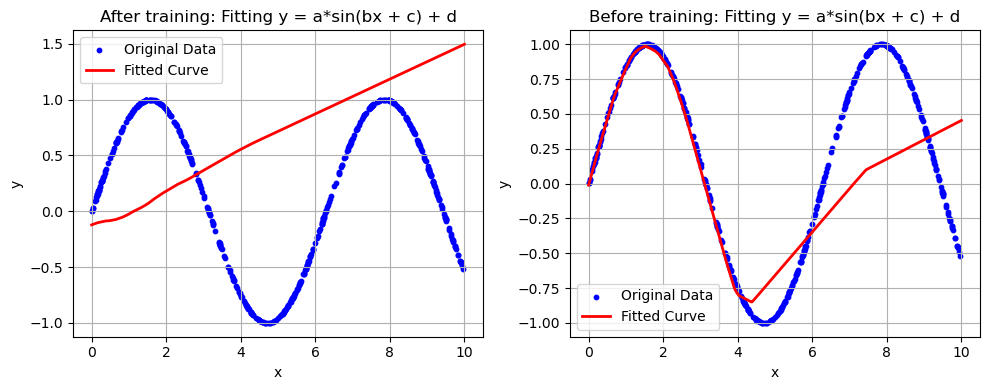

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
torch.manual_seed(1)
# Generate the random dataset (as previously discussed)
x_np = np.random.uniform(0, 10, 500)
y_np = np.sin(x_np)

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_np, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(y_np, dtype=torch.float32).view(-1, 1)

# Instantiate the model
model = TwoLayerNN(input_dim=1, hidden_dim=50, num_class=1)
y_fit_before = model(torch.tensor(x_fit, dtype=torch.float32).view(-1, 1)).detach().numpy()

learning_rate = 0.01
# momentum = 0.9
# Define the loss function (L2 loss) and the optimizer (Gradient Descent)
criterion = nn.MSELoss()  # L2 loss
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass: compute the model output
    y_pred = model(x_train)
    
    # Compute the loss
    loss = criterion(y_pred, y_train)
    
    # Backward pass: compute the gradients
    optimizer.zero_grad()  # Zero the gradient buffers
    loss.backward()  # Compute gradients
    
    # Update the model parameters using gradient descent
    optimizer.step()
    
    # if (epoch + 1) % 5000 == 0:
    #     # update_lr
    #     new_lr = learning_rate // 10
    #     for param_group in optimizer.param_groups:
    #         param_group['lr'] = new_lr
    

    # Print the loss every 100 epochs
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the original data and the fitted curve
x_fit = np.linspace(0, 10, 500)
y_fit_after = model(torch.tensor(x_fit, dtype=torch.float32).view(-1, 1)).detach().numpy()


# Create a figure with two subplots side by side
plt.figure(figsize=(10, 4))

# First subplot (After training)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.scatter(x_np, y_np, label='Original Data', color='blue', s=10)
plt.plot(x_fit, y_fit_before, label='Fitted Curve', color='red', linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("After training: Fitting y = a*sin(bx + c) + d")
plt.legend()
plt.grid(True)

# Second subplot (Before training)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.scatter(x_np, y_np, label='Original Data', color='blue', s=10)
plt.plot(x_fit, y_fit_after, label='Fitted Curve', color='red', linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Before training: Fitting y = a*sin(bx + c) + d")
plt.legend()
plt.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()



cuda
Epoch [500/10000], Loss: 0.3720
Epoch [1000/10000], Loss: 0.2633
Epoch [1500/10000], Loss: 0.2076
Epoch [2000/10000], Loss: 0.1792
Epoch [2500/10000], Loss: 0.1820
Epoch [3000/10000], Loss: 0.1593
Epoch [3500/10000], Loss: 0.1435
Epoch [4000/10000], Loss: 0.1257
Epoch [4500/10000], Loss: 0.1084
Epoch [5000/10000], Loss: 0.0892
Epoch [5500/10000], Loss: 0.0743
Epoch [6000/10000], Loss: 0.0561
Epoch [6500/10000], Loss: 0.0441
Epoch [7000/10000], Loss: 0.0340
Epoch [7500/10000], Loss: 0.0272
Epoch [8000/10000], Loss: 0.0230
Epoch [8500/10000], Loss: 0.0243
Epoch [9000/10000], Loss: 0.0243
Epoch [9500/10000], Loss: 0.0243
Epoch [10000/10000], Loss: 0.0243


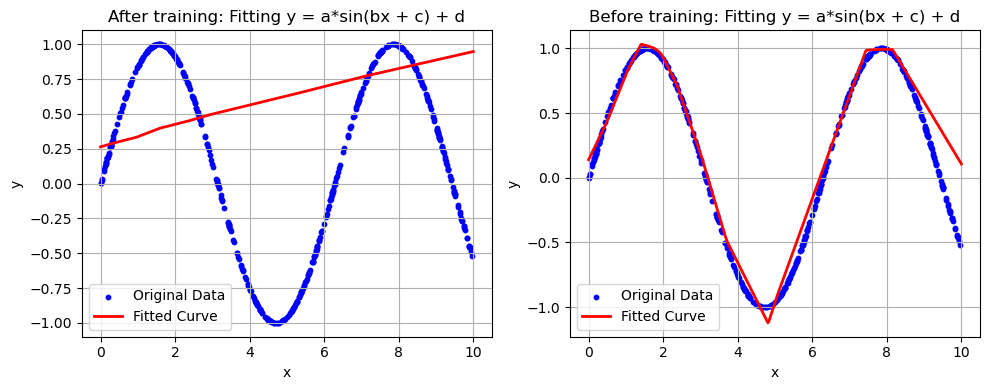

In [20]:
class SinDataset(Dataset):
    def __init__(self, data, labels):
        """
        初始化数据集
        data: 输入数据，例如一个 NumPy 数组或 PyTorch 张量
        labels: 对应的标签
        """
        self.data = data
        self.labels = labels

    def __len__(self):
        # 每个Dataset都必须写，返回数据集的大小
        return len(self.data)

    def __getitem__(self, idx):
        # 每个Dataset都必须写，获取指定索引idx的数据和标签
        sample = self.data[idx]
        label = self.labels[idx]
        return sample, label
        

np.random.seed(1)
torch.manual_seed(1)
# Generate the random dataset (as previously discussed)
x_np = np.random.uniform(0, 10, 500)
y_np = np.sin(x_np)
# Convert the data to PyTorch tensors
x_train = torch.tensor(x_np, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(y_np, dtype=torch.float32).view(-1, 1)


# Instantiate the model
model = TwoLayerNN(input_dim=1, hidden_dim=20, num_class=1)
y_fit_before = model(torch.tensor(x_fit, dtype=torch.float32).view(-1, 1)).detach().numpy()

dataset = SinDataset(x_train, y_train)
train_dataloader = DataLoader(dataset, batch_size=500, shuffle=False, drop_last=False)

learning_rate = 0.01
# momentum = 0.9
# Define the loss function (L2 loss) and the optimizer (Gradient Descent)
criterion = nn.MSELoss()  # L2 loss
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)
# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    for data in train_dataloader:
        x_train, y_train = data
        x_train = x_train.to(device)
        y_train = y_train.to(device)
        # Forward pass: compute the model output

        y_pred = model(x_train)
        
        # Compute the loss
        loss = criterion(y_pred, y_train)
        
        # Backward pass: compute the gradients
        optimizer.zero_grad()  # Zero the gradient buffers
        loss.backward()  # Compute gradients
        
        # Update the model parameters using gradient descent
        optimizer.step()
        
        if (epoch + 1) % 8000 == 0:
            # update_lr
            new_lr = learning_rate // 2
            for param_group in optimizer.param_groups:
                param_group['lr'] = new_lr
        

        # Print the loss every 100 epochs
        if (epoch + 1) % 500 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

model = model.to('cpu')

# Plot the original data and the fitted curve
x_fit = np.linspace(0, 10, 500)
y_fit_after = model(torch.tensor(x_fit, dtype=torch.float32).view(-1, 1)).detach().numpy()


# Create a figure with two subplots side by side
plt.figure(figsize=(10, 4))

# First subplot (After training)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.scatter(x_np, y_np, label='Original Data', color='blue', s=10)
plt.plot(x_fit, y_fit_before, label='Fitted Curve', color='red', linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("After training: Fitting y = a*sin(bx + c) + d")
plt.legend()
plt.grid(True)

# Second subplot (Before training)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.scatter(x_np, y_np, label='Original Data', color='blue', s=10)
plt.plot(x_fit, y_fit_after, label='Fitted Curve', color='red', linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Before training: Fitting y = a*sin(bx + c) + d")
plt.legend()
plt.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()



Impact of:
- Larger model size
- Data selection during training
- Different optimizer
- Novel architecture (e.g., Dropout, BatchNormalization, etc.)
- Weight initialization
- Novel loss / regularization

a playground by Google: https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-gauss&learningRate=0.03&regularizationRate=0&noise=0&networkShape=5,2,2&seed=0.07966&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
